# **[필수과제2] crime.csv 시계열 분석**
- 해당 범죄와 교통사고건에 대해 시계열적으로 그래프 그리기
- 본인이 생각하는 인사이트 정리
- 배웠던 시각화 문법 이용해 수치 시각화

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [29]:
df = pd.read_csv('crime.csv')

In [30]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...,...
460906,460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           460911 non-null  int64  
 1   OFFENSE_TYPE_ID      460911 non-null  object 
 2   OFFENSE_CATEGORY_ID  460911 non-null  object 
 3   REPORTED_DATE        460911 non-null  object 
 4   GEO_LON              457296 non-null  float64
 5   GEO_LAT              457296 non-null  float64
 6   NEIGHBORHOOD_ID      460911 non-null  object 
 7   IS_CRIME             460911 non-null  int64  
 8   IS_TRAFFIC           460911 non-null  int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 31.6+ MB


In [32]:
# datetime으로 변환
df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460911 entries, 0 to 460910
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Unnamed: 0           460911 non-null  int64         
 1   OFFENSE_TYPE_ID      460911 non-null  object        
 2   OFFENSE_CATEGORY_ID  460911 non-null  object        
 3   REPORTED_DATE        460911 non-null  datetime64[ns]
 4   GEO_LON              457296 non-null  float64       
 5   GEO_LAT              457296 non-null  float64       
 6   NEIGHBORHOOD_ID      460911 non-null  object        
 7   IS_CRIME             460911 non-null  int64         
 8   IS_TRAFFIC           460911 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.6+ MB


In [34]:
# index 지정
df = df.set_index('REPORTED_DATE')

In [35]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0


## 연도별 범죄 & 교통사고 수

In [40]:
crime_by_year = df['IS_CRIME'].resample('Y').sum()

In [41]:
traffic_by_year = df['IS_TRAFFIC'].resample('Y').sum()

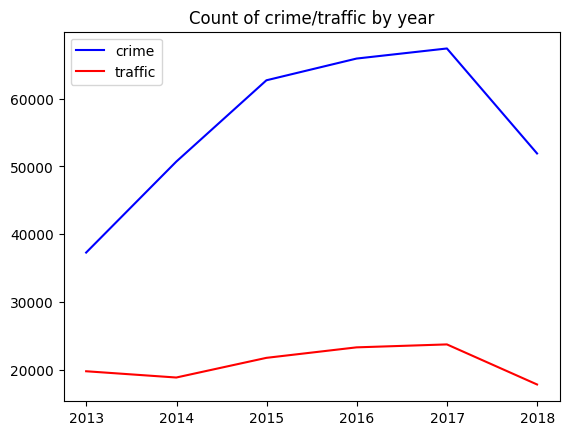

In [51]:
plt.plot(crime_by_year.index, crime_by_year, label='crime', color='b')
plt.plot(traffic_by_year.index, traffic_by_year, label='traffic', color='r')

plt.title('Count of crime/traffic by year')
plt.legend()
plt.show()

- ### **범죄가 교통사고보다 많이 발생. 2017년에 범죄/교통사고 수가 가장 많았음.**

## 평일/주말 범죄 수 비교

### **df.index.dayofweek**
- 월화수목금토일 -> 0~6

In [52]:
# 주말 = 1, 평일 = 0
df['IS_WEEKEND'] = (df.index.dayofweek >= 5).astype(int)

In [53]:
df

,Unnamed: 0,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC,IS_WEEKEND
REPORTED_DATE,,,,,,,,,
2014-06-29 02:01:00,0,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1,1
2014-06-29 01:54:00,1,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0,1
2014-06-29 02:00:00,2,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0,1
2014-06-29 02:18:00,3,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0,1
2014-06-29 04:17:00,4,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0,1
...,...,...,...,...,...,...,...,...,...
2017-09-13 05:48:00,460906,burglary-business-by-force,burglary,-105.033840,39.762365,west-highland,1,0,0
2017-09-12 20:37:00,460907,weapon-unlawful-discharge-of,all-other-crimes,-105.040313,39.721264,barnum-west,1,0,0
2017-09-12 16:32:00,460908,traf-habitual-offender,all-other-crimes,-104.847024,39.779596,montbello,1,0,0


<Axes: xlabel='IS_WEEKEND', ylabel='IS_CRIME'>

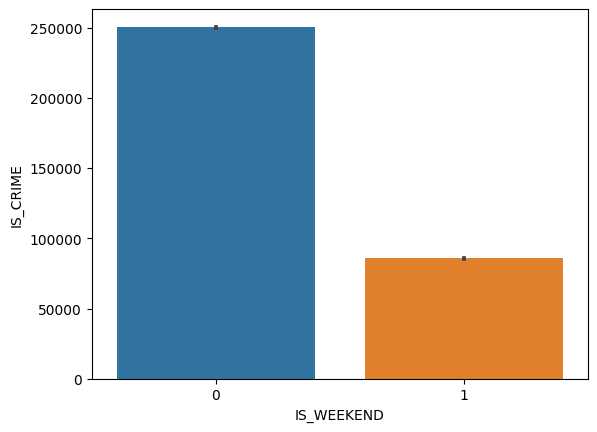

In [57]:
sns.barplot(x='IS_WEEKEND', y='IS_CRIME', estimator = sum, data=df)

<Axes: xlabel='IS_WEEKEND', ylabel='IS_CRIME'>

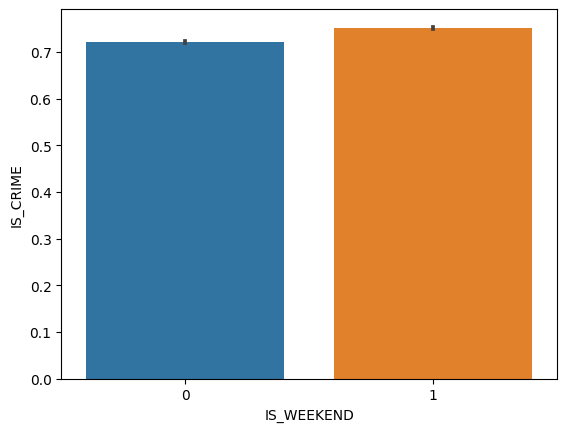

In [56]:
sns.barplot(x='IS_WEEKEND', y='IS_CRIME', data=df)

- ### **주말에 범죄 발생률 높음 (평일, 주말 일수 차이)**

## 평일/주말 교통사고 수 비교

<Axes: xlabel='IS_WEEKEND', ylabel='IS_TRAFFIC'>

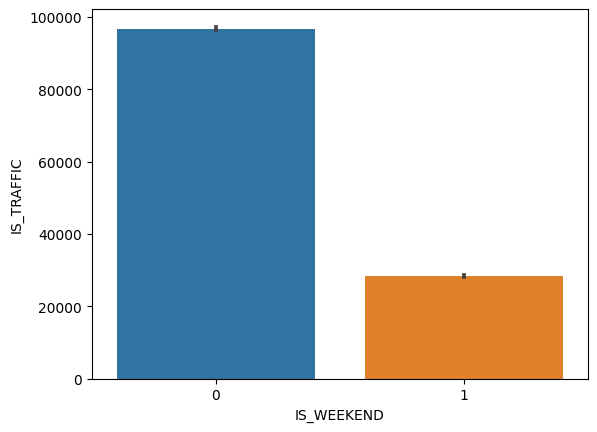

In [59]:
sns.barplot(x='IS_WEEKEND', y='IS_TRAFFIC', estimator = sum, data=df)

<Axes: xlabel='IS_WEEKEND', ylabel='IS_TRAFFIC'>

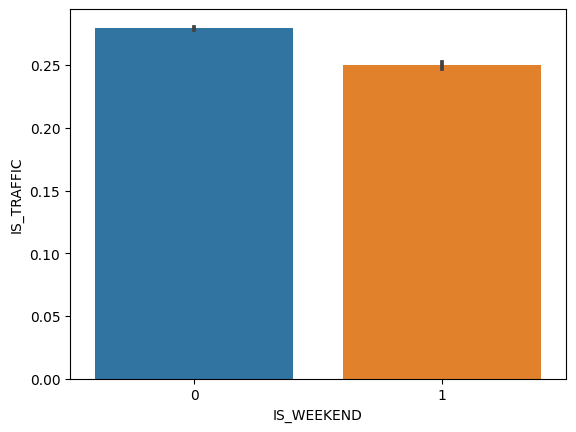

In [60]:
sns.barplot(x='IS_WEEKEND', y='IS_TRAFFIC', data=df)

- ### **평일에 교통사고 발생률 높음**